In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt

#path and the files with sci
path = '/Users/varungandhi/Downloads/python_notebooks/'
#jan to march
file1_jan = path + 'ceilo1_jan.csv'
file1_feb = path + 'ceilo1_feb.csv'
file1_mar = path + 'ceilo1_mar.csv'

file2_jan = path + 'ceilo2_jan.csv'
file2_feb = path + 'ceilo2_feb.csv'
file2_mar = path + 'ceilo2_mar.csv'

#oct to nov
file1_oct = path + 'ceilo1_oct.csv'
file1_nov = path + 'ceilo1_nov.csv'
file1_dec = path + 'ceilo1_dec.csv'


file2_oct = path + 'ceilo2_oct.csv'
file2_nov = path + 'ceilo2_nov.csv'
file2_dec = path + 'ceilo2_dec.csv'



In [2]:
omsz_path = '/Volumes/Seagate Backup Plus Drive/data_1/Data_OMSZ_10min.pkl'
df_omsz = pd.read_pickle(omsz_path)
df_omsz['idő (UTC)'] = pd.to_datetime(df_omsz['idő (UTC)'])
df_oct_dec = df_omsz[(df_omsz['idő (UTC)'] >= '2020-10-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2020-12-31 23:50:00')]

In [3]:
#january to march
j_1 = pd.read_csv(file1_jan)
f_1 = pd.read_csv(file1_feb)
m_1 = pd.read_csv(file1_mar)

j_2 = pd.read_csv(file2_jan)
f_2 = pd.read_csv(file2_feb)
m_2 = pd.read_csv(file2_mar)

#october to november
o_1 = pd.read_csv(file1_oct)
n_1 = pd.read_csv(file1_nov, sep = ';')
d_1 = pd.read_csv(file1_dec, sep = ';')

o_2 = pd.read_csv(file2_oct)
n_2 = pd.read_csv(file2_nov, sep = ';')
d_2 = pd.read_csv(file2_dec, sep = ';')

In [4]:
n_1['time'] = pd.to_datetime(n_1['time'])
d_1['time'] = pd.to_datetime(d_1['time'])

In [5]:
n_2['time'] = pd.to_datetime(n_2['time'])
d_2['time'] = pd.to_datetime(d_2['time'])

In [6]:
#n_1 = n_1[(n_1['time'] >= '2020.10.01 00:00')]
#n_2 = n_2[(n_2['time'] >= '2020.10.01 00:00')]


In [7]:
n_1['time']

0       2020-11-01 00:00:00
1       2020-11-01 00:01:00
2       2020-11-01 00:02:00
3       2020-11-01 00:03:00
4       2020-11-01 00:04:00
                ...        
43194   2020-11-30 23:55:00
43195   2020-11-30 23:56:00
43196   2020-11-30 23:57:00
43197   2020-11-30 23:58:00
43198   2020-11-30 23:59:00
Name: time, Length: 43199, dtype: datetime64[ns]

In [8]:
n_2['time']

0       2020-11-01 00:00:00
1       2020-11-01 00:01:00
2       2020-11-01 00:02:00
3       2020-11-01 00:03:00
4       2020-11-01 00:04:00
                ...        
43194   2020-11-30 23:55:00
43195   2020-11-30 23:56:00
43196   2020-11-30 23:57:00
43197   2020-11-30 23:58:00
43198   2020-11-30 23:59:00
Name: time, Length: 43199, dtype: datetime64[ns]

In [9]:
j_m_1 = pd.concat([j_1, f_1, m_1], axis = 0, ignore_index= True)
j_m_2 = pd.concat([j_2, f_2, m_2], axis = 0, ignore_index= True)

n_d_1 = pd.concat([o_1,n_1, d_1], axis = 0, ignore_index= True)
n_d_2 = pd.concat([o_2,n_2, d_2], axis = 0, ignore_index= True)


In [10]:
#j_m_2

In [11]:
#reading elte 1 minute data
df_1m = pd.read_pickle('/Volumes/Seagate Backup Plus Drive/data_1/Data_ELTE_1min.pkl')

In [12]:
#reading garden 1 minute data
df_garden = pd.read_pickle('/Volumes/Seagate Backup Plus Drive/data_1/Data_BME_garden.pkl')

In [13]:
df_garden['TIMESTAMP_UTC']

0        2020-11-20 16:22:00
1        2020-11-20 16:23:00
2        2020-11-20 16:24:00
3        2020-11-20 16:25:00
4        2020-11-20 16:26:00
                 ...        
237264   2021-05-04 10:46:00
237265   2021-05-04 10:47:00
237266   2021-05-04 10:48:00
237267   2021-05-04 10:49:00
237268   2021-05-04 10:50:00
Name: TIMESTAMP_UTC, Length: 237269, dtype: datetime64[ns]

In [14]:
# for january to 11 march only 
df_1j_m = df_1m[(df_1m['TIMESTAMP'] >= '2021-01-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2021-03-31 23:59:00')]
df_2j_m = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2021-01-01 00:00:00') & (df_garden['TIMESTAMP_UTC'] <= '2021-03-31 23:59:00')]

# for 20 nov to dec
df_1n_d = df_1m[(df_1m['TIMESTAMP'] >= '2020-10-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2020-12-31 23:59:00')]
df_2n_d = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2020-10-01 00:00:00') & (df_garden['TIMESTAMP_UTC'] <= '2020-12-31 23:59:00')]



In [15]:
## for january to march ## renaming columns
xj_m = df_1j_m[['TIMESTAMP','rh_Avg(1)','rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)']]
yj_m = df_2j_m[['TIMESTAMP_UTC','RH1_corr_cut', 'RH_2_corr_cut', 'AirTC_1_Avg', 'AirTC_2_Avg']]

In [16]:
#for nov to dec  ## renaming columns
xn_d = df_1n_d[['TIMESTAMP','rh_Avg(1)','rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)']]
yn_d = df_2n_d[['TIMESTAMP_UTC','RH1_corr_cut', 'RH_2_corr_cut', 'AirTC_1_Avg', 'AirTC_2_Avg']]

In [17]:
xn_d = xn_d.rename(columns={'TIMESTAMP': 'TIMESTAMP_UTC'})
xj_m = xj_m.rename(columns={'TIMESTAMP': 'TIMESTAMP_UTC'})

In [18]:
yj_m.columns

Index(['TIMESTAMP_UTC', 'RH1_corr_cut', 'RH_2_corr_cut', 'AirTC_1_Avg',
       'AirTC_2_Avg'],
      dtype='object')

In [19]:
#xn_d

In [20]:
xj_m.reset_index(inplace= True)
yj_m.reset_index(inplace = True)

xn_d.reset_index(inplace= True)
yn_d.reset_index(inplace = True)


In [21]:
yn_d['TIMESTAMP_UTC']

0       2020-11-20 16:22:00
1       2020-11-20 16:23:00
2       2020-11-20 16:24:00
3       2020-11-20 16:25:00
4       2020-11-20 16:26:00
                ...        
59493   2020-12-31 23:55:00
59494   2020-12-31 23:56:00
59495   2020-12-31 23:57:00
59496   2020-12-31 23:58:00
59497   2020-12-31 23:59:00
Name: TIMESTAMP_UTC, Length: 59498, dtype: datetime64[ns]

In [22]:
j_m_2.columns

Index(['time', 'pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3'],
      dtype='object')

In [23]:
zj_m_1 = j_m_1[['time','bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]
zn_d_1 = n_d_1[['time','bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]

zj_m_2 = j_m_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]
zn_d_2 = n_d_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]

In [24]:
zj_m = pd.concat([zj_m_1, zj_m_2], axis = 1, ignore_index= False)
zn_d = pd.concat([zn_d_1, zn_d_2], axis = 1, ignore_index= False)
#zn_d

In [25]:
zj_m.reset_index(inplace= True, drop= True)
zn_d.reset_index(inplace= True, drop= True)

In [26]:
#zj_m = zj_m.rename(columns={'time': 'TIMESTAMP_UTC'})

zj_m['time'] = pd.to_datetime(zj_m['time'])
zn_d['time'] = pd.to_datetime(zn_d['time'])
zn_d = zn_d.rename(columns={'time': 'TIMESTAMP_UTC'})


In [27]:
j_m = pd.merge(xj_m,yj_m,on='TIMESTAMP_UTC',how = 'inner')
j_m = pd.concat([j_m,zj_m],axis = 1,ignore_index= False)

#n_d = pd.concat([zn_d,n_d],axis = 1,ignore_index= False)
#j_m = pd.concat([xj_m,yj_m,zj_m], axis = 1, ignore_index= False)
#n_d = pd.concat([xn_d,yn_d, zn_d], axis = 1, ignore_index= False)
#for i in range(len(zn_d['TIMESTAMP_UTC'])):
#    q = baba[i].strftime(format('%Y-%m-%d %H:%M'))
#    caca.appendp(q)




In [28]:
zn_d['TIMESTAMP_UTC'] = pd.to_datetime(zn_d['TIMESTAMP_UTC'])
n_d = pd.merge(xn_d,yn_d,on='TIMESTAMP_UTC', how = 'left')
n_d = pd.merge(n_d,zn_d,on='TIMESTAMP_UTC', how = 'right')
n_d

,index_x,TIMESTAMP_UTC,rh_Avg(1),rh_Avg(2),temp_Avg(1),temp_Avg(2),index_y,RH1_corr_cut,RH_2_corr_cut,AirTC_1_Avg,...,cbh_l3,cbe_l1,cbe_l2,cbe_l3,cdp_l1,cdp_l2,cdp_l3,cde_l1,cde_l2,cde_l3
0,NaN,2020-10-01 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,221.0,14.0,-1.0,63.0,116.0,-1.0,16.0,27.0,-1.0
1,NaN,2020-10-01 00:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,12.0,-1.0,-1.0,122.0,-1.0,-1.0,10.0,-1.0,-1.0
2,NaN,2020-10-01 00:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,8.0,-1.0,-1.0,114.0,-1.0,-1.0,16.0,-1.0,-1.0
3,NaN,2020-10-01 00:03:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,239.0,15.0,-1.0,84.0,86.0,-1.0,46.0,39.0,-1.0
4,NaN,2020-10-01 00:04:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,203.0,8.0,-1.0,83.0,79.0,-1.0,24.0,52.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131683,59569.0,2020-12-31 23:55:00,90.7,92.1,0.875,1.086,59493.0,95.504,97.272,0.293,...,-1.0,10.0,-1.0,-1.0,33.0,-1.0,-1.0,7.0,-1.0,-1.0
131684,59570.0,2020-12-31 23:56:00,90.7,92.2,0.852,1.089,59494.0,95.400,97.272,0.272,...,-1.0,7.0,-1.0,-1.0,53.0,-1.0,-1.0,10.0,-1.0,-1.0
131685,59571.0,2020-12-31 23:57:00,90.7,92.2,0.840,1.089,59495.0,95.296,97.272,0.261,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
131686,59572.0,2020-12-31 23:58:00,90.8,92.2,0.828,1.107,59496.0,95.296,97.272,0.254,...,-1.0,12.0,9.0,-1.0,29.0,67.0,-1.0,6.0,5.0,-1.0


In [29]:
##a = ['index', 'TIMESTAMP', 'rh_Avg(1)', 'rh_Avg(2)', 'temp_Avg(1)',
#       'temp_Avg(2)', 'index', 'TIMESTAMP_UTC', 'RH_1_corr', 'RH_2_corr',
#       'AirTC_1_Avg', 'AirTC_2_Avg', 'time', 'cbh', 'pbl', 'bcc', 'cbe', 'cde',
#       'cho', 'nn1', 'nn2', 'nn3', 'sci']


In [30]:
#j_m.columns = a

In [31]:
#n_d.columns = a

In [32]:
len(j_m.index)

129600

In [33]:
x = j_m['sci'].values
y = j_m['RH_2_corr_cut'].values
z = j_m['rh_Avg(1)'].values

x1 = n_d['sci'].values
y1 = n_d['RH_2_corr_cut'].values
z1 = n_d['rh_Avg(1)'].values

In [34]:
#def sci(x,a,b,c):
#    list_empty = []
#    for i in range(len(x)):
#        if x[i] == a:
#            list_empty.append(10)
#        elif x[i] == b:
#            list_empty.append(20)
#            
#        elif x[i] == c:
#            list_empty.append(30)
#            
#        
#        else:
#            list_empty.append(float('NAN'))
#            
#    return list_empty
#

def sci(x, lower_value,value):
    ll = []
    for i in range(len(x)):
        if x[i] ==lower_value:
            ll.append(value)
        else:
            ll.append(float('NAN'))
            
    return ll

def relative_humidity(x,lower_value,value):
    list_empty = []
    for i in range(len(x)):
        if x[i] >= lower_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

In [35]:
#j_m.index[100153:]

In [36]:
h95 = relative_humidity(y, 95,40)
h100 = relative_humidity(y, 98,50)
h95_24 = relative_humidity(z, 95,60)
h100_24 = relative_humidity(z, 98,70)


j_m['h95']  = h95
j_m['h100'] = h100
j_m['h95_24'] = h95_24
j_m['h100_24'] = h100_24

In [37]:
rain = sci(x, 1.0,20.0)
fog = sci(x, 2.0,10.0)
snow = sci(x, 3.0,30.0)
#sci2 = sci(x,a = 1.0, b= 2.0, c= 3.0)

j_m['rain'] = rain
j_m['fog'] = fog
j_m['snow'] = snow

In [38]:
#j_m['sci2'] = sci2

In [39]:
h95 = relative_humidity(y1, 95,40)
h100 = relative_humidity(y1, 98,50)
h95_24 = relative_humidity(z1, 95,60)
h100_24 = relative_humidity(z1, 98,70)

n_d['h95']  = h95
n_d['h100'] = h100
n_d['h95_24'] = h95_24
n_d['h100_24'] = h100_24


rain = sci(x1, 1.0,20)
fog = sci(x1, 2.0,10)
snow = sci(x1, 3.0,30)

n_d['rain'] = rain
n_d['fog'] = fog
n_d['snow'] = snow

In [40]:
j_m.columns

Index(['index_x', 'TIMESTAMP_UTC', 'rh_Avg(1)', 'rh_Avg(2)', 'temp_Avg(1)',
       'temp_Avg(2)', 'index_y', 'RH1_corr_cut', 'RH_2_corr_cut',
       'AirTC_1_Avg', 'AirTC_2_Avg', 'time', 'bcc', 'cho', 'nn1', 'nn2', 'nn3',
       'sci', 'pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3', 'h95', 'h100',
       'h95_24', 'h100_24', 'rain', 'fog', 'snow'],
      dtype='object')

In [41]:
#n_d['window_p'] = sci(n_d, 4,40)

%matplotlib notebook
fig, ax = plt.subplots(1,1,figsize = (25,6),sharex= True)
ax.plot(joined['TIMESTAMP_UTC'],joined['rh_Avg(1)'], label = '24m rh', color = 'blue')
ax.plot(joined['TIMESTAMP_UTC'],joined['RH_2_corr'], label = '1m rh', color = 'red')

#axis parameters
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation= 20)

ax.set_ylim([20,100])
ax.set_yticks(np.arange(20,101,20))


ax.legend(loc= 'upper left', prop={'size': 12}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
ax.set_ylabel('rh', fontsize=20, labelpad =15 )
    
ax.minorticks_on()
    
#ax.set_xbound(left, right)
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
#ax.xaxis.set_major_locator(DayLocator(interval= 10))
    
##padding
ax.tick_params(axis='x', which='major', pad=15)
ax.tick_params(axis='y', which='major', pad=5)


ax2 = ax.twinx()
ax2.scatter(joined['TIMESTAMP_UTC'],joined['cbh'], label = 'cbh', color = 'brown')

ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=8)

ax2.set_ylim([0,200])
ax2.set_yticks(np.arange(0,201,50))

ax2.legend(loc= 'lower right', prop={'size': 12}, ncol = 5)
ax2.set_ylabel('cbh', fontsize=20, labelpad =15 )
    
ax2.minorticks_on()
    
#ax.set_xbound(left, right)
ax2.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
#ax.xaxis.set_major_locator(DayLocator(interval= 10))

ax3 = ax.twinx()

ax3.scatter(joined['TIMESTAMP_UTC'],joined['pbl'], label = 'pbl', color = 'green')

ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='minor', labelsize=8)

ax3.set_ylim([0,200])
ax3.set_yticks(np.arange(0,201,50))

ax3.legend(loc= 'lower left', prop={'size': 12}, ncol = 5)
ax3.set_ylabel('pbl', fontsize=20, labelpad =15 )
ax3.spines["right"].set_position(("axes", 1.06))
ax3.minorticks_on()
   
#ax.set_xbound(left, right)
ax3.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
#ax.xaxis.set_major_locator(DayLocator(interval= 10))


fig.tight_layout()

fig, ax = plt.subplots(1,1,figsize = (25,8),sharex= True)
ax.plot(joined['TIMESTAMP_UTC'],joined['pbl'], label = 'pbl', color = 'blue')
#ax.plot(joined['TIMESTAMP_UTC'],joined['RH_2_corr'], label = '1m rh', color = 'red')

#axis parameters
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', labelrotation= 20)

#ax.set_ylim([20,100])
#ax.set_yticks(np.arange(20,101,20))


ax.legend(loc= 'upper right', prop={'size': 12}, ncol = 5)
ax.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
ax.set_ylabel('pbl', fontsize=20, labelpad =15 )
    
ax.minorticks_on()
    
#ax.set_xbound(left, right)
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
#ax.xaxis.set_major_locator(DayLocator(interval= 10))
    
##padding
ax.tick_params(axis='x', which='major', pad=15)
ax.tick_params(axis='y', which='major', pad=5)


ax2 = ax.twinx()
ax2.scatter(joined['TIMESTAMP_UTC'],joined['cbh'], label = 'cbh', color = 'brown')

ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=8)

ax2.set_ylim([0,200])
ax2.set_yticks(np.arange(0,201,50))

ax2.legend(loc= 'lower right', prop={'size': 12}, ncol = 5)
ax2.set_ylabel('cbh', fontsize=20, labelpad =15 )
    
ax2.minorticks_on()
    
#ax.set_xbound(left, right)
ax2.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
fig.tight_layout()

In [42]:
#df = pd.read_csv('/Users/varungandhi/Downloads/python_notebooks/final.csv')
#df.columns

In [43]:
#df = df[['rain','fog', 'TIMESTAMP_UTC']]
#df['TIMESTAMP_UTC'] = pd.to_datetime(df['TIMESTAMP_UTC'])

In [44]:
j_m['TIMESTAMP_UTC']

0        2021-01-01 00:00:00
1        2021-01-01 00:01:00
2        2021-01-01 00:02:00
3        2021-01-01 00:03:00
4        2021-01-01 00:04:00
                 ...        
129595   2021-03-31 23:55:00
129596   2021-03-31 23:56:00
129597   2021-03-31 23:57:00
129598   2021-03-31 23:58:00
129599   2021-03-31 23:59:00
Name: TIMESTAMP_UTC, Length: 129600, dtype: datetime64[ns]

In [45]:
n_d['TIMESTAMP_UTC'][72120]

Timestamp('2020-11-20 15:07:00')

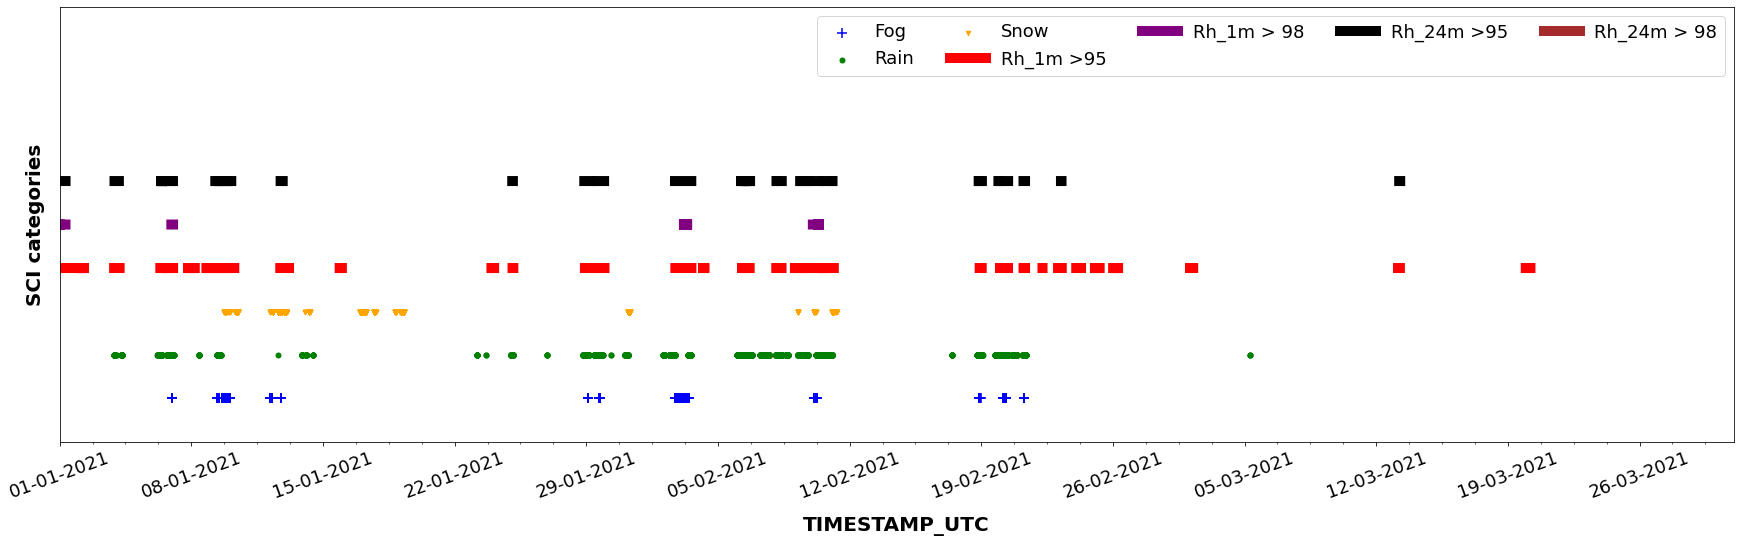

In [55]:
%matplotlib inline
fig, ax1 = plt.subplots(1,1,figsize = (30,8),sharex= True)

left = dt.date(2021, 1, 1)
right = dt.date(2021, 3, 31)
ax1.scatter(j_m['TIMESTAMP_UTC'],j_m['fog'], label = 'Fog', color = 'b', marker = '+', s = 100)
ax1.scatter(j_m['TIMESTAMP_UTC'],j_m['rain'],label = 'Rain',color = 'g', marker = '.', s = 100)
ax1.scatter(j_m['TIMESTAMP_UTC'],j_m['snow'],label = 'Snow',color = 'orange', marker = 'v', s= 20)

ax1.plot(j_m['TIMESTAMP_UTC'],j_m['h95'], label = 'Rh_1m >95', color = 'red', linewidth = 10)
ax1.plot(j_m['TIMESTAMP_UTC'],j_m['h100'], label = 'Rh_1m > 98', color = 'purple', linewidth = 10)
ax1.plot(j_m['TIMESTAMP_UTC'],j_m['h95_24'], label = 'Rh_24m >95', color = 'black', linewidth = 10)
ax1.plot(j_m['TIMESTAMP_UTC'],j_m['h100_24'], label = 'Rh_24m > 98', color = 'brown', linewidth = 10)

#axis parameters
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)

ax1.set_ylim([10,100])
ax1.set_yticks(np.arange(0,81,20))
ax1.axes.yaxis.set_ticks([])

ax1.legend(loc= 'upper right', prop={'size': 18}, ncol = 5)
ax1.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight='bold')
ax1.set_ylabel('SCI categories', fontsize=20, labelpad =15,fontweight='bold')
    
ax1.minorticks_on()
    
ax1.set_xbound(left, right)
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
ax1.xaxis.set_major_locator(DayLocator(interval= 7))
#plt.savefig('/Users/varungandhi/Downloads/paper2/plots/SCI_jan.png')

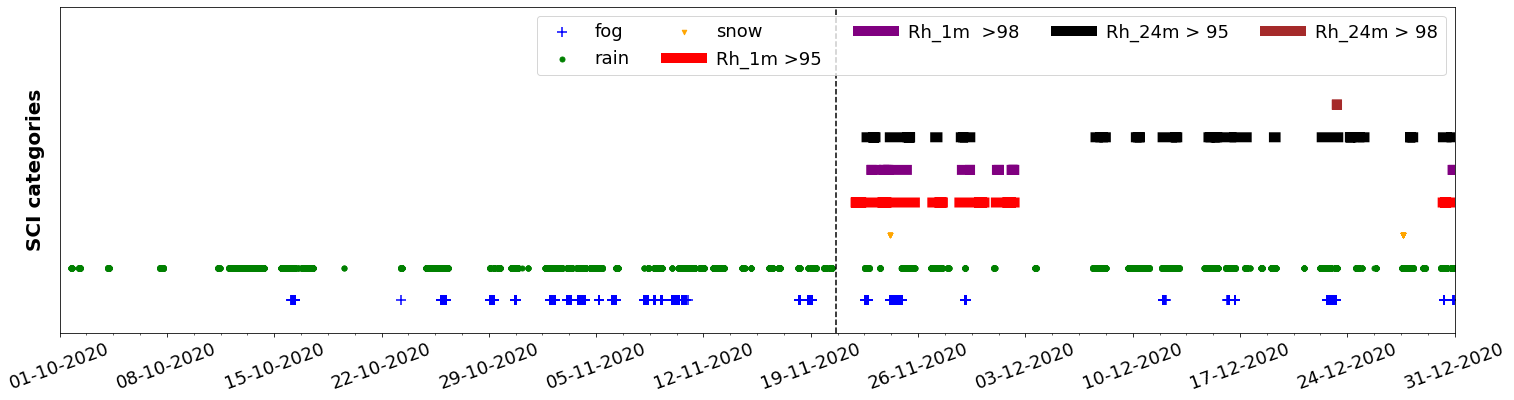

In [370]:
fig, ax1 = plt.subplots(1,1,figsize = (25,6),sharex= True)


left = dt.date(2020, 10, 1)
right = dt.date(2020, 12, 31)
ax1.axvline(x = n_d['TIMESTAMP_UTC'][72120], linestyle = '--',color = 'black')
ax1.scatter(n_d['TIMESTAMP_UTC'],n_d['fog'], label = 'fog', color = 'blue'  ,marker = '+',s =100)
ax1.scatter(n_d['TIMESTAMP_UTC'],n_d['rain'],label = 'rain',color = 'g'     ,marker = '.',s =100)
ax1.scatter(n_d['TIMESTAMP_UTC'],n_d['snow'],label = 'snow',color = 'orange',marker = 'v',s =20)

#ax1.plot(n_d['TIMESTAMP_UTC'],n_d['window_p'], label = 'precipitation or window particle', color = 'black', linewidth = 10)

    
ax1.plot(n_d['TIMESTAMP_UTC'],n_d['h95'], label = 'Rh_1m >95', color = 'red', linewidth = 10)
ax1.plot(n_d['TIMESTAMP_UTC'],n_d['h100'], label = 'Rh_1m  >98', color = 'purple', linewidth = 10)
ax1.plot(n_d['TIMESTAMP_UTC'],n_d['h95_24'], label = 'Rh_24m > 95', color = 'black', linewidth = 10)
ax1.plot(n_d['TIMESTAMP_UTC'],n_d['h100_24'], label = 'Rh_24m > 98', color = 'brown', linewidth = 10)

#axis parameters
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='x', labelrotation= 20)

ax1.set_ylim([20,100])
ax1.set_yticks(np.arange(0,81,20))
ax1.axes.yaxis.set_ticks([])


ax1.legend(loc= 'upper right', prop={'size': 18}, ncol = 5)
#ax1.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15)
ax1.set_ylabel('SCI categories', fontsize=20, labelpad =15, fontweight='bold')
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
ax1.xaxis.set_major_locator(DayLocator(interval= 7))
    
ax1.minorticks_on()
ax1.set_xbound(left, right)
#plt.savefig('/Users/varungandhi/Downloads/paper2/plots/SCI_oct.png')


In [212]:
j_m.to_csv('jan_mar.csv', sep = ',')
n_d.to_csv('nov_dec.csv', sep = ',')

In [108]:
j_m['TIMESTAMP_UTC']

0        2021-01-01 00:01:00
1        2021-01-01 00:02:00
2        2021-01-01 00:03:00
3        2021-01-01 00:04:00
4        2021-01-01 00:05:00
                 ...        
100149   2021-03-11 13:10:00
100150   2021-03-11 13:11:00
100151   2021-03-11 13:12:00
100152   2021-03-11 13:13:00
100153   2021-03-11 13:14:00
Name: TIMESTAMP_UTC, Length: 100154, dtype: datetime64[ns]

In [109]:
j_m['fog']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
100149   NaN
100150   NaN
100151   NaN
100152   NaN
100153   NaN
Name: fog, Length: 100154, dtype: float64

In [110]:
j_m['rain']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
100149   NaN
100150   NaN
100151   NaN
100152   NaN
100153   NaN
Name: rain, Length: 100154, dtype: float64

In [111]:
j_m.index

RangeIndex(start=0, stop=100154, step=1)

In [112]:
j_m['fog']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
100149   NaN
100150   NaN
100151   NaN
100152   NaN
100153   NaN
Name: fog, Length: 100154, dtype: float64

In [41]:
j_m['TIMESTAMP_UTC']

0        2021-01-01 00:01:00
1        2021-01-01 00:02:00
2        2021-01-01 00:03:00
3        2021-01-01 00:04:00
4        2021-01-01 00:05:00
                 ...        
100149   2021-03-11 13:10:00
100150   2021-03-11 13:11:00
100151   2021-03-11 13:12:00
100152   2021-03-11 13:13:00
100153   2021-03-11 13:14:00
Name: TIMESTAMP_UTC, Length: 100154, dtype: datetime64[ns]